# Introduction to Numpy
These exercises go along session 2 of the Python course. If at any point you are unsure what to do, take a look back at the Jupyter notebook from the session. It is divided into 2 parts: 
- Part 1: Basic NumPy exercises

In this part you will learn the basics of NumPy, and it is meant to get you comfortable using NumPy in combination with everything you learned in session 1. 
- Part 2: Harder exercises

These exercises combine the skills the first session and this session. You might have to google to figure some of the steps out. That is totally fine, and an important part of programming!



## Part 1

### 1. Importing the module
- Import the NumPy module. Note: there are several ways to do this, have a look at the lesson notebook to remind yourself how. Your answer for the following questions might change slightly depending on how you import NumPy here.

In [1]:
# Use this cell to do your calculations
import numpy as np

### 1. Make your first array
- a. Make a list with the values [[3,4,5], [6,7,8]]. 
- b. Convert that list into an NumPy array.
- c. How many dimensions does the array have?
- d. What is the size of the first dimension?

In [2]:
# Use this cell to do your calculations
my_list = [[3,4,5], [6,7,8]]
my_array = np.array(my_list)
print(my_array.ndim)
print(my_array.shape[0])

2
2


### 2. Make your second array with array initialization
- a. Make an array that has the shape (3,4) containing all ones
- b. Use indexing to change the value of all elements in the second column to 3.
- c. Use indexing to output the second row of the array.


In [3]:
# Use this cell to do your calculations
my_array = np.zeros((3,4))
my_array[:,1] = 3
my_array[1]

array([0., 3., 0., 0.])

### 3. Use array methods
- a. Make an array that contains the values 0-14 (hint: try using arange (https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)). The shape should be (15,)
- b. Use reshape to give the array the shape (5,3).
- c. Find the sum of each row (hint: use the axis parameter)
- d. Find the mean of each column (hint: use the axis parameter)

In [4]:
# Use this cell to do your calculations
my_array = np.arange(15)
my_array = my_array.reshape((5,3))

# You can do this in one step
my_array = np.arange(15).reshape((5,3))
print(my_array.sum(axis=1))
print(my_array.mean(axis=0))

[ 3 12 21 30 39]
[6. 7. 8.]


### 4. More array methods
- a. Create an array with values 0-8 and shape (3,3). Hint: Use steps a and b from the previous exercise to do this.
- b. Use an array method to switch the rows and the columns around
- c. Use an array to get the values on the diagonal (hint: https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html)
- d. Now find the value of each element in the array squared (hint: you don't have to use a for-loop for this!)

In [5]:
# Use this cell to do your calculations
ar = np.arange(9).reshape((3,3))
ar = ar.T # Switch rows and columns

# Two ways to find the diagonal
np.diagonal(ar)
ar[np.eye(3,dtype=bool)]

# Values squared
ar**2

array([[ 0,  9, 36],
       [ 1, 16, 49],
       [ 4, 25, 64]], dtype=int32)

### 5. Working with nans
- a. Create an array with values 0-11 and shape (4,3). Hint: Use steps a and b from exercise 3 to do this.
- b. Set every value in the second row to nan.
- c. Find the mean of every column (hint: use the nanmean function to exclude the second row).


In [6]:
# Use this cell to do your calculations
ar = np.arange(12, dtype=float).reshape((4,3)) # Have to do dtype=float for the np.nan to work!
ar[1,:] = np.nan
print(np.nanmean(ar, axis=0))

[5. 6. 7.]


## Part 2
### Exercise: Fake neuronal data

You now know how to work with numpy arrays. We're going to use a numpy array to analyse our data. The data is generated using the function 'make_data' and is stored in my_data. The data contains (fake) activity traces for a number of cells (the rows), each column is one second. 

In [7]:
import numpy as np
import random

def make_data():
    my_data = np.random.exponential(1.0, (np.random.randint(0,10), 100))
    for row in my_data:
        row[random.sample(list(np.arange(100)),5)] = 100
    return my_data

### 1: Explore the data
First we'll use some of the array methods to explore the data. Try to answer the following questions:
- a. How many cells are there in the array?
- b. How long was the recording (hint: count the number of columns)
- c. What is the mean activity of each cell? (hint: use axis to get the right dimension)
- d. What is the standard deviation of the activity of each cell?

In [8]:
### Write your code here ###
my_data = make_data()
my_data.shape[0] # number of cells
my_data.shape[1] # length of recording
print(np.mean(my_data, axis=1)) # Mean activity of each cell
print(np.std(my_data, axis=1)) # standard deviation of each cell

[6.01409942 5.949576   6.00892028 6.09465026 5.94344595 6.19744679]
[21.5822905  21.59614814 21.59224081 21.57104674 21.59603858 21.56085729]


### 2: Find and replace the outliers
Your data has some outliers, any value that is above 20. 
- a. Find the values above 20 for each cell. How many outliers are there per cell?
- b. Replace the outliers with nans
- c. Recalculate the mean and the std as above, but exclude the nans. How different are the answers from your answer in question 1?


In [9]:
### Write your code here ###
outliers = my_data>20
outliers.sum(axis=1) # Number of outliers per cell

my_data[outliers]= np.nan # Replace with nans
print(np.nanmean(my_data, axis=1)) # Mean activity of each cell
print(np.nanstd(my_data, axis=1)) # standard deviation of each cell


[1.06747307 0.99955368 1.06202135 1.15226343 0.993101   1.26047031]
[0.96361768 0.94139695 1.15188232 1.12085204 0.90408142 1.36480872]


In [10]:
my_data.shape

(6, 100)

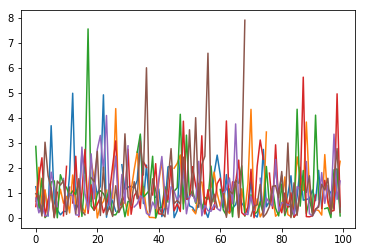

In [12]:
import matplotlib.pyplot as plt

plt.plot(my_data.T)

In [14]:
np.linspace(-0.2, 0.2)
np.linspace(-0.2, 0.2, 10)

array([-0.2       , -0.15555556, -0.11111111, -0.06666667, -0.02222222,
        0.02222222,  0.06666667,  0.11111111,  0.15555556,  0.2       ])

In [15]:
np.linspace?